In [1]:
# import dabl
import pandas as pd
import matplotlib.pyplot as plt

print("Started!")

Started!


In [2]:
cases_2018_raw = pd.read_csv("csv/cases/cases/cases_2018.csv", nrows=13724300)
disp_key_raw = pd.read_csv("csv/keys/keys/disp_name_key.csv")
print("Fetched data")

Fetched data


In [3]:
cases_2018 = cases_2018_raw.copy()
disp_key = disp_key_raw.copy()
print("Duplicated data")

Duplicated data


In [4]:
state_key = pd.read_csv("csv/keys/keys/cases_state_key.csv")
state_code_to_name = {}

for ind in state_key.index:
    state_code_to_name[state_key.state_code[ind]] = state_key.state_name[ind]

print("Built state code to name mapping")
state_key = state_key.iloc[0:0] # clear DF

Built state code to name mapping


In [5]:
# dabl.detect_types(cases_2018)

In [6]:
cases_2018.head()
disp_key.head()

,year,disp_name,disp_name_s,count
0,2010,1,258 crpc,15765
1,2010,2,abated,22021
2,2010,3,absconded,16773
3,2010,4,acquitted,406015
4,2010,5,allowed,244023


We now change the `disp_name` keys in `cases_2018` to their textual meanings retrieved from `disp_key`.

In [7]:
disp_name_from_id = {}

for ind in disp_key.index:
    disp_name_from_id[disp_key.disp_name[ind]] = disp_key.disp_name_s[ind]

cases_2018.disp_name = cases_2018.disp_name.apply(lambda x: disp_name_from_id[x])

In [8]:
cases_2018.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-201900000012018,2018,1,1,1,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999,0,1943,2975.0,other,2018-01-01,2018-02-07,2018-01-01,2018-02-07,2018-02-07
1,01-01-01-201900000022018,2018,1,1,1,MHNB030000032018,chief judicial magistrate,0 male,0 male,-9999,0,1943,3315.0,withdrawn,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
2,01-01-01-201900000032018,2018,1,1,1,MHNB030000042018,chief judicial magistrate,0 male,0 male,-9999,0,1943,5877.0,withdrawn,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
3,01-01-01-201900000042018,2018,1,1,1,MHNB030000052018,chief judicial magistrate,0 male,0 male,-9999,0,1943,840.0,withdrawn,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
4,01-01-01-201900000052018,2018,1,1,1,MHNB030000062018,chief judicial magistrate,-9998 unclear,0 male,-9999,1,1943,840.0,allowed,2018-01-01,2018-01-09,2018-01-01,2018-01-09,2018-01-09


In [9]:
# dabl.detect_types(cases_2018)

In [10]:
cases_2018 = cases_2018.loc[cases_2018.disp_name.isin(['allowed', 'dismissed', 'convicted', 'plea bargaining', 'reject', 'plead guilty', 'withdrawn', 'acquitted', 'confession', 'bail granted', 'settled', 'bail refused', 'bail rejected', 'died'])] # select some cute dispositions
# cases_2018 = cases_2018.loc[~cases_2018.disp_name.isin(["disposition var missing"])] # remove missing disposition cases
cases_2018.disp_name.value_counts()

allowed            1104047
dismissed           441631
convicted           416122
plea bargaining     339551
reject              268025
plead guilty        233732
withdrawn           221903
acquitted           207801
confession          120545
bail granted         74272
settled              48661
bail refused         31767
bail rejected        11693
died                  1147
Name: disp_name, dtype: int64

In [11]:
# dabl.plot(cases_2018, "disp_name")

In [12]:
import seaborn as sns
sns.set()

# sns.catplot(x="disp_name", y="female_defendant", data=cases_2018, aspect=4)

In [13]:
# ratio of males and females with specific disposition (w.r.t their total number of cases)

# male_def_cases, female_def_cases = cases_2018.loc[cases_2018.female_defendant == "0 male"], cases_2018.loc[cases_2018.female_defendant == "1 female"]
# male_pet_cases, female_pet_cases = cases_2018.loc[cases_2018.female_petitioner == "0 male"], cases_2018.loc[cases_2018.female_petitioner == "1 female"]

# for disp_name in cases_2018.disp_name.unique():
#     print("\n\n----------------------", disp_name, sep='\n')
    
#     print("Defendant split:")
#     male_disp, female_disp = male_def_cases.loc[male_def_cases.disp_name == disp_name], female_def_cases.loc[female_def_cases.disp_name == disp_name]
#     print("Males:", male_disp.shape[0], "/", male_def_cases.shape[0], "=", male_disp.shape[0] / male_def_cases.shape[0])
#     print("Females:", female_disp.shape[0], "/", female_def_cases.shape[0], "=", female_disp.shape[0] / female_def_cases.shape[0])
#     print("Ratio female / male:", (female_disp.shape[0] / female_def_cases.shape[0]) / (male_disp.shape[0] / male_def_cases.shape[0]))
    
#     print("\nPetitioner split:")
#     male_disp, female_disp = male_pet_cases.loc[male_pet_cases.disp_name == disp_name], female_pet_cases.loc[female_pet_cases.disp_name == disp_name]
#     print("Males:", male_disp.shape[0], "/", male_pet_cases.shape[0], "=", male_disp.shape[0] / male_pet_cases.shape[0])
#     print("Females:", female_disp.shape[0], "/", female_pet_cases.shape[0], "=", female_disp.shape[0] / female_pet_cases.shape[0])
#     print("Ratio female / male:", (female_disp.shape[0] / female_pet_cases.shape[0]) / (male_disp.shape[0] / male_pet_cases.shape[0]))

# plt.figure(figsize=(30,30))
# sns.displot(hue="female_defendant", x="disp_name", data=cases_2018.loc[cases_2018.female_defendant.isin(["0 male", "1 female"])])
# plt.show()


**Some filtering:** We add a new duration attribute, which counts the number of days the case was active for. We then remove cases with a negative duration, and also those which have unrealistic decision dates.

In [14]:
# from functools import partial
# to_date = partial(pd.to_datetime)

cases_2018_date_columns = ["date_of_filing", "date_of_decision", "date_first_list", "date_next_list"]
for date_col in cases_2018_date_columns:
    cases_2018[date_col] = pd.to_datetime(cases_2018[date_col], errors="coerce")
    
cases_2018 = cases_2018.dropna(subset=cases_2018_date_columns)

cases_2018.loc[:,"duration"] = (cases_2018.date_of_decision - cases_2018.date_of_filing).dt.days + 1
cases_2018 = cases_2018.loc[(cases_2018.duration > 0) & (cases_2018.date_of_decision <= pd.to_datetime("2022-12-31"))]

# print(cases_2018.date_of_filing.describe(datetime_is_numeric=True))
# print("--------")
# print(cases_2018.date_of_decision.describe(datetime_is_numeric=True))
# print("--------")
# print(cases_2018.date_first_list.describe(datetime_is_numeric=True))
# print("--------")
# print(cases_2018.date_next_list.describe(datetime_is_numeric=True))


In [15]:
# sns.catplot(x="duration", y="disp_name", data=cases_2018, kind="box", aspect=1.5)
# cases_2018.loc[cases_2018.duration <= 0].disp_name.value_counts()

In [16]:
for disp_name in cases_2018.disp_name.unique():
    print("\n\n----------------", disp_name, sep="\n")
    print(cases_2018.loc[cases_2018.disp_name == disp_name].duration.describe())



----------------
withdrawn
count    220683.000000
mean        158.682409
std         162.585139
min           1.000000
25%          30.000000
50%         108.000000
75%         236.000000
max         981.000000
Name: duration, dtype: float64


----------------
allowed
count    1.084043e+06
mean     4.992065e+01
std      9.178430e+01
min      1.000000e+00
25%      4.000000e+00
50%      1.400000e+01
75%      4.700000e+01
max      9.830000e+02
Name: duration, dtype: float64


----------------
dismissed
count    434400.000000
mean        156.574993
std         172.726550
min           1.000000
25%          13.000000
50%          96.000000
75%         246.000000
max         980.000000
Name: duration, dtype: float64


----------------
reject
count    264793.000000
mean         41.692658
std          83.543059
min           1.000000
25%           5.000000
50%          14.000000
75%          36.000000
max         929.000000
Name: duration, dtype: float64


----------------
settled
count    4

## Fun Observations

- Case is dismissed when the judge thinks that time will be wasted since not enough grounds. They seem to have among the highest mean duration.
- Next closest in terms of mean duration seems to be acquittal. Both are kind of in favour of the defendant.
- On the other hand, convictions seem to have among the smallest mean. But, they're weirdly distributed I think.

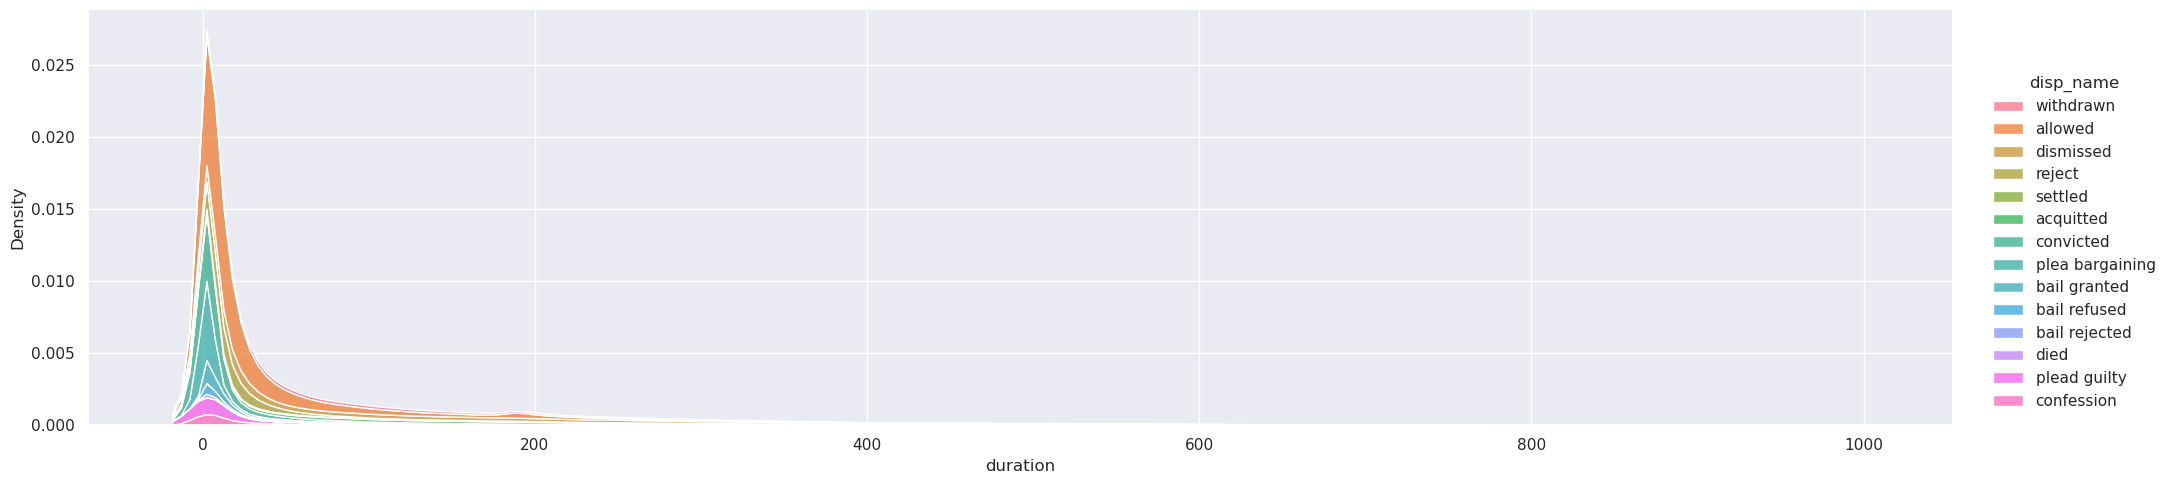

In [17]:
# sns.kdeplot(cases_2018.loc[cases_2018.disp_name == "dismissed"].duration)
# sns.kdeplot(cases_2018.loc[cases_2018.disp_name == "acquitted"].duration)
# sns.kdeplot(cases_2018.loc[cases_2018.disp_name == "convicted"].duration)

sns.displot(data=cases_2018, x="duration", hue="disp_name", multiple="stack", kind="kde", aspect=4)

In [18]:
cases_2018.duration.describe()

count    3.315810e+06
mean     7.635962e+01
std      1.298738e+02
min      1.000000e+00
25%      2.000000e+00
50%      1.500000e+01
75%      9.000000e+01
max      9.830000e+02
Name: duration, dtype: float64

1     354892
13    345964
3     336887
17    317807
23    213732
22    210055
14    202151
10    199800
9     173345
16    172590
8     146069
7     108313
4     106473
26    102921
5      58219
2      51264
15     44007
29     42366
6      35831
18     31191
11     25630
12     11505
27     11139
25      7207
24      2033
20      1575
21      1081
32       905
31       420
19       256
33        94
30        88
Name: state_code, dtype: int64

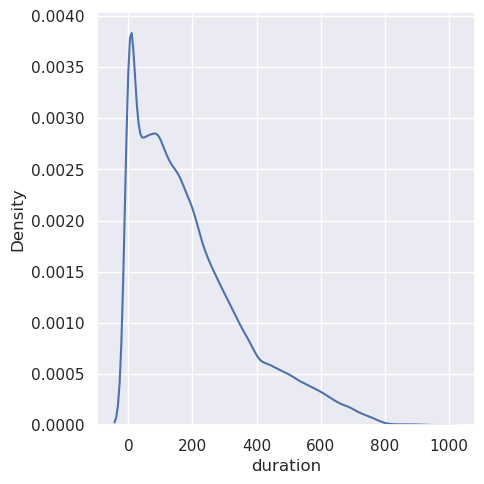

In [19]:
sns.displot(cases_2018.loc[cases_2018.disp_name == "acquitted"].duration, kind="kde")
cases_2018.state_code.value_counts()

In [20]:
judges = pd.read_csv("csv/judges_clean.csv")
judges.end_date.fillna("31-12-2022")
judges_date_columns = ["start_date", "end_date"]
judges[judges_date_columns] = judges[judges_date_columns].apply(pd.to_datetime)
judges.loc[:,"duration"] = (judges.end_date - judges.start_date).dt.days + 1
judges = judges.loc[judges.duration >= 1]

/tmp/ipykernel_45160/3601416055.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  judges[judges_date_columns] = judges[judges_date_columns].apply(pd.to_datetime)
/tmp/ipykernel_45160/3601416055.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  judges[judges_date_columns] = judges[judges_date_columns].apply(pd.to_datetime)


In [21]:
female_judges = judges.loc[judges.female_judge == "1 female"]
male_judges = judges.loc[judges.female_judge == "0 nonfemale"]

print("Females:", female_judges.shape[0], "Males:", male_judges.shape[0])

Females: 19221 Males: 50011


In [22]:
print(female_judges.start_date.describe(datetime_is_numeric=True))
print("---")
print(female_judges.end_date.describe(datetime_is_numeric=True))
print("---")
print(female_judges.duration.describe())

count                            19221
mean     2015-02-15 15:05:05.103792640
min                1966-06-20 00:00:00
25%                2013-10-25 00:00:00
50%                2015-09-09 00:00:00
75%                2017-03-22 00:00:00
max                2020-02-22 00:00:00
Name: start_date, dtype: object
---
count                            19221
mean     2016-05-24 08:55:08.381457920
min                1967-05-30 00:00:00
25%                2015-05-20 00:00:00
50%                2016-12-31 00:00:00
75%                2018-03-06 00:00:00
max                2020-10-01 00:00:00
Name: end_date, dtype: object
---
count    19221.000000
mean       464.743093
std        459.609867
min          2.000000
25%        135.000000
50%        327.000000
75%        667.000000
max       7275.000000
Name: duration, dtype: float64


We proceed to find compare distributions of duration in both genders. (Sure?)

,state_name,male_duration,female_duration,duration_mean_abs_diff
22,Madhya Pradesh,689.814654,688.882278,0.932375
16,Gujarat,336.720851,332.740312,3.980539
15,West Bengal,683.911811,690.159681,6.247870
21,Punjab,777.718579,785.065606,7.347027
1,Andhra Pradesh,500.471839,492.673767,7.798072
17,Chhattisgarh,680.500000,689.100000,8.600000
9,Tamil Nadu,512.836516,503.635255,9.201261
28,Goa,657.776923,645.462687,12.314237
2,Karnataka,436.833192,452.744272,15.911081
25,Delhi,486.051724,465.494220,20.557504


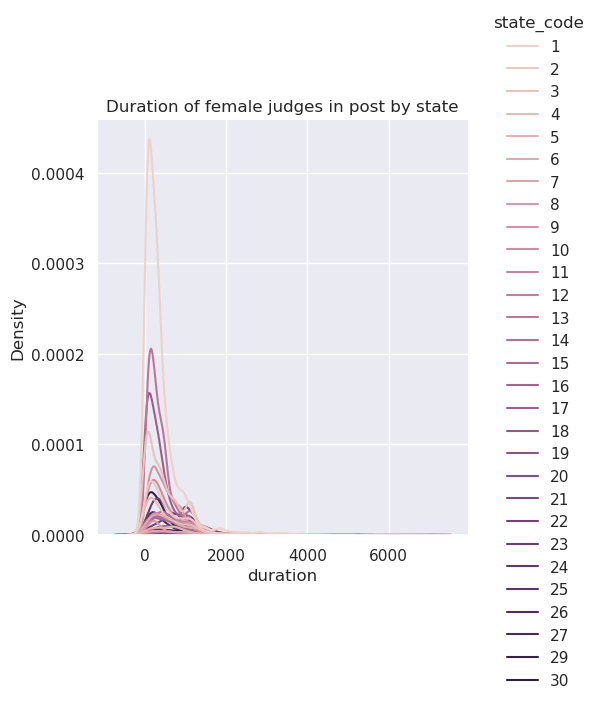

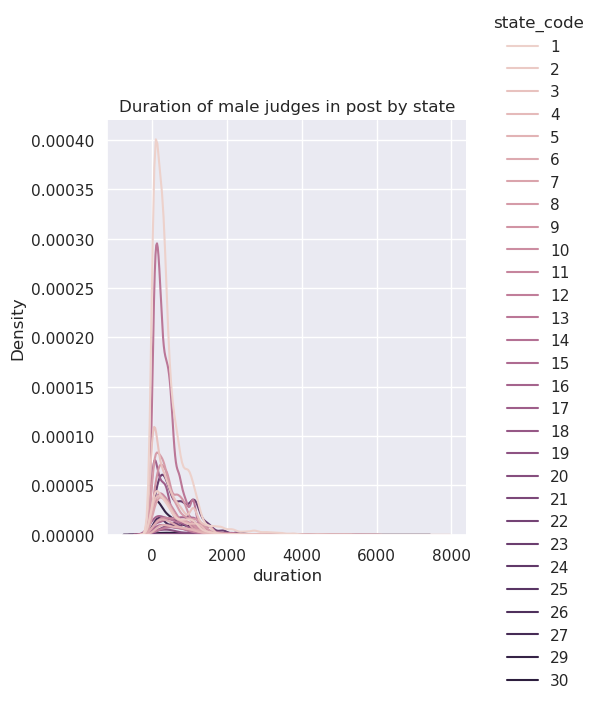

In [23]:
sns.displot(data=female_judges, x="duration", hue="state_code", kind="kde").set(title="Duration of female judges in post by state")
sns.displot(data=male_judges, x="duration", hue="state_code", kind="kde").set(title="Duration of male judges in post by state")

state_name_series, male_duration_mean_series, female_duration_mean_series = [], [], []

for state_code in female_judges.state_code.unique():
    # print(state_code, "::::::::")
    state_name_series.append(state_code_to_name[state_code])
    
    female_duration_mean = female_judges.loc[female_judges.state_code == state_code].duration.mean()
    female_duration_mean_series.append(female_duration_mean)
    
    male_duration_mean = male_judges.loc[male_judges.state_code == state_code].duration.mean()
    male_duration_mean_series.append(male_duration_mean)

state_judge_aggregates = pd.DataFrame({"state_name": state_name_series, "male_duration": male_duration_mean_series, "female_duration": female_duration_mean_series})
state_judge_aggregates["duration_mean_abs_diff"] = abs(state_judge_aggregates.male_duration - state_judge_aggregates.female_duration)

state_judge_aggregates = state_judge_aggregates.sort_values(by="duration_mean_abs_diff")
state_judge_aggregates
# sns.plot()
    
# sns.displot(male_judges.duration, kind="kde")
# sns.displot(judges.duration, kind="kde")

In [24]:
judge_case_key = pd.read_csv("csv/keys/keys/judge_case_merge_key.csv")
print("Fetched judges", judge_case_key.shape)

Fetched judges (12901146, 3)


Clearly, there's a lot of missing data to be able to merge all cases to judges. This file was supposed to contain the information about judges from all the years, and it has too few rows.

In [25]:
cases_2018 = pd.merge(cases_2018, judge_case_key, on="ddl_case_id", how="inner")
print(cases_2018.columns)

Index(['ddl_case_id', 'year', 'state_code', 'dist_code', 'court_no', 'cino',
       'judge_position', 'female_defendant', 'female_petitioner',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list',
       'date_last_list', 'date_next_list', 'duration', 'ddl_filing_judge_id',
       'ddl_decision_judge_id'],
      dtype='object')


In [26]:
cases_2018_diff_judge = cases_2018.loc[(~cases_2018.ddl_decision_judge_id.isnull()) & (cases_2018.ddl_filing_judge_id != cases_2018.ddl_decision_judge_id)]
cases_2018_same_judge = cases_2018.loc[(~cases_2018.ddl_decision_judge_id.isnull()) & (cases_2018.ddl_filing_judge_id == cases_2018.ddl_decision_judge_id)]

print("Diff:", cases_2018_diff_judge.shape[0], ", Same:", cases_2018_same_judge.shape[0], ", Other Cases:", cases_2018.shape[0] - cases_2018_diff_judge.shape[0] - cases_2018_same_judge.shape[0])

Diff: 77052 , Same: 900667 , Other Cases: 9534


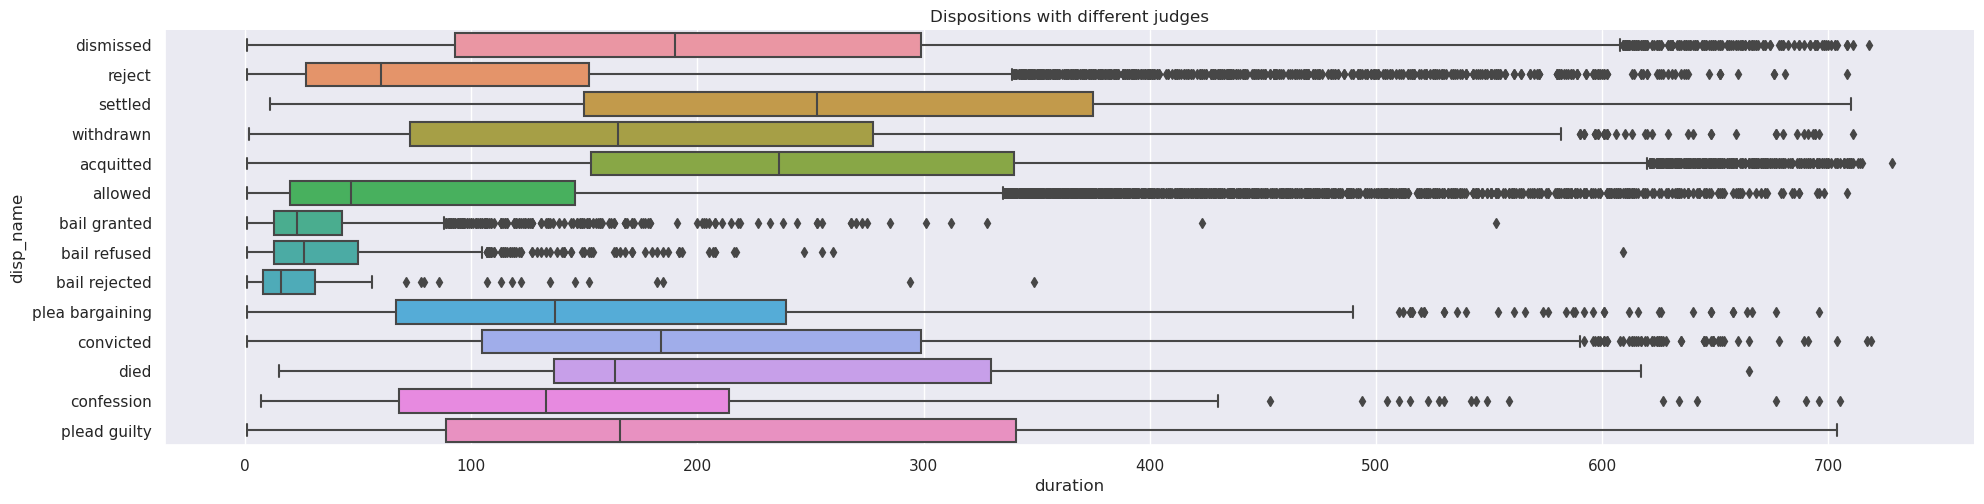

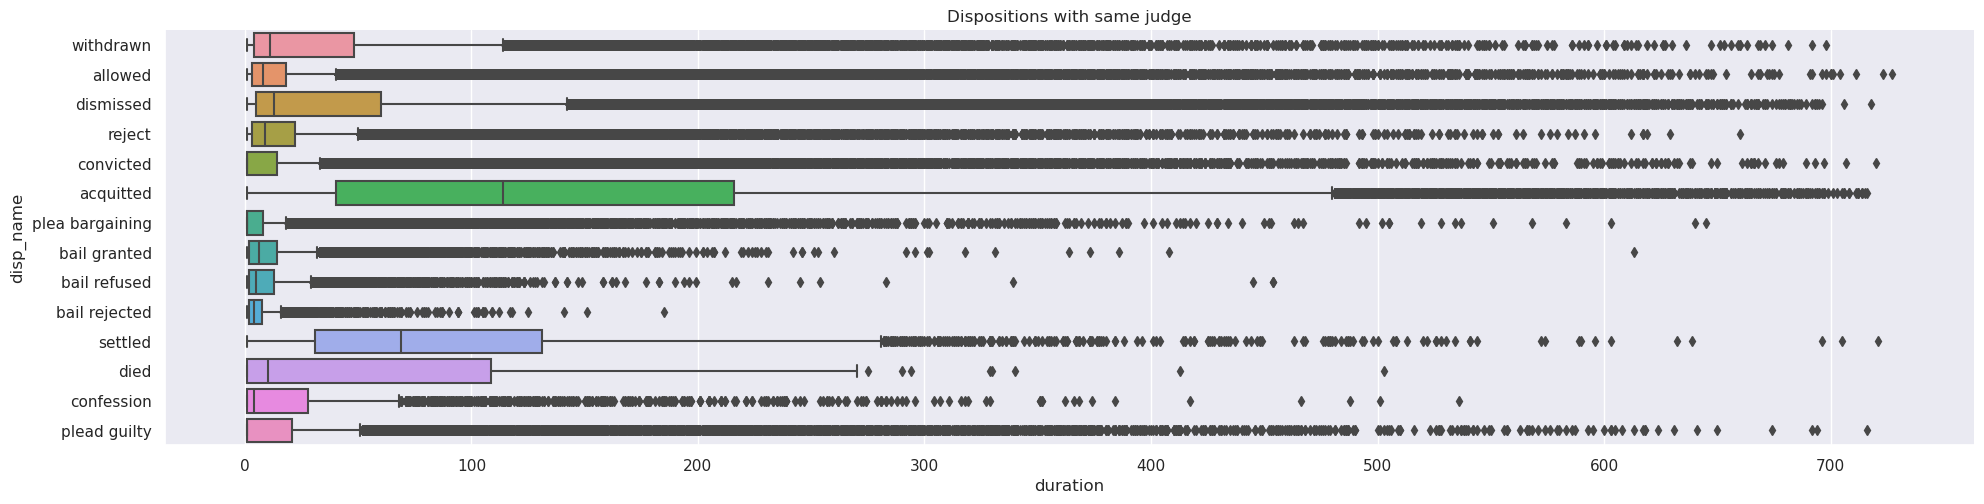

In [27]:
sns.catplot(x="duration", y="disp_name", data=cases_2018_diff_judge, kind="box", aspect=4).set(title="Dispositions with different judges")
sns.catplot(x="duration", y="disp_name", data=cases_2018_same_judge, kind="box", aspect=4).set(title="Dispositions with same judge")

In [28]:
print(cases_2018_diff_judge.duration.describe())
print("----")
print(cases_2018_same_judge.duration.describe())

count    77052.000000
mean       164.549888
std        148.573139
min          1.000000
25%         37.000000
50%        126.000000
75%        252.000000
max        728.000000
Name: duration, dtype: float64
----
count    900667.000000
mean         31.247419
std          67.173775
min           1.000000
25%           2.000000
50%           8.000000
75%          24.000000
max         727.000000
Name: duration, dtype: float64


On an average, cases with different filing and decision judges take much longer to complete.

In [29]:
# sns.displot(x="disp_name", data=cases_2018_diff_judge, aspect=4)
# sns.displot(x="disp_name", data=cases_2018_same_judge, aspect=4)

In [30]:
judge_case_key.head()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id
0,01-01-01-201900000022018,5.0,5.0
1,01-01-01-201900000032017,5.0,5.0
2,01-01-01-201900000032018,94.0,94.0
3,01-01-01-201900000042016,3.0,5.0
4,01-01-01-201900000042018,156.0,156.0


In [31]:
print("Percentage of specific disposition among all cases with different (line 1) and same (line 2) judges\n")
for disp_name in cases_2018.disp_name.unique():
    print(disp_name, ":")
    print(cases_2018_diff_judge.loc[cases_2018_diff_judge.disp_name == disp_name].shape[0] / cases_2018_diff_judge.shape[0])
    print(cases_2018_same_judge.loc[cases_2018_same_judge.disp_name == disp_name].shape[0] / cases_2018_same_judge.shape[0])
    print("--------------------")

Percentage of specific disposition among all cases with different (line 1) and same (line 2) judges

withdrawn :
0.04099828687120386
0.034672081912626974
--------------------
allowed :
0.3017442765924311
0.4450568301048001
--------------------
dismissed :
0.1668743186419561
0.11831675858003013
--------------------
reject :
0.1450838394850231
0.15315316315575012
--------------------
settled :
0.0060867985256709755
0.003404143817859431
--------------------
acquitted :
0.2065747806676011
0.04882381612738115
--------------------
convicted :
0.037753724757306754
0.058365633469417665
--------------------
plea bargaining :
0.012887400716399315
0.025213536190401113
--------------------
bail granted :
0.026877952551523646
0.04566837688068953
--------------------
bail refused :
0.01275761823184343
0.020022938555537176
--------------------
bail rejected :
0.001855889529149146
0.0065618036410793334
--------------------
died :
0.0004153039505788299
0.0001865284283758592
--------------------
confess

In [32]:
cases_2018.columns

Index(['ddl_case_id', 'year', 'state_code', 'dist_code', 'court_no', 'cino',
       'judge_position', 'female_defendant', 'female_petitioner',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list',
       'date_last_list', 'date_next_list', 'duration', 'ddl_filing_judge_id',
       'ddl_decision_judge_id'],
      dtype='object')